# Example notebook: how to use the ArcGIS toolset

### 0. First steps

Let's start by importing arcpy and other required Python libraries:

In [2]:
import arcpy
import os
from arcpy.sa import *
from arcpy import env

ModuleNotFoundError: No module named 'arcpy'

Then let's import some of the modules developed for the NRIP project:

In [2]:
#os.chdir(r'D:\Sior Consulting Limited\CEAC Solutions - Documents\JAMNRIP Jamaica NRIP\ArcGIS\Notebooks\nrip-jamaica')

In [1]:
from conditional_eval import *
from geometric_analysis import *
from hydrological_analysis import * 
from inundation_analysis import *
from geomorphological_analysis import *
from utils import * 

ModuleNotFoundError: No module named 'arcpy'

Before we start geo-processing data, we create an ArcGIS file geodatabase:

In [5]:
gdb_folder_path = r'D:\Sior Consulting Limited\CEAC Solutions - Documents\JAMNRIP Jamaica NRIP\ArcGIS\Working\NRIP Data\Geodatabases'
gdb_name = 'Examples_NRIP.gdb'
create_geodatabase(gdb_folder_path, gdb_name)

geodatabase successfully created


And we make this our default workspace:

In [6]:
env.workspace = os.path.join(gdb_folder_path,gdb_name) 

### 1. Digital Elevation Model

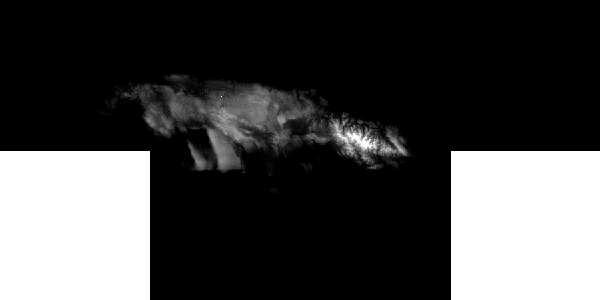

In [7]:
DTM_raster = Raster(os.path.join(r'D:\Sior Consulting Limited\CEAC Solutions - Documents\JAMNRIP Jamaica NRIP\Incoming Data\DESCJam DEM World Bank-LOCJamaica-FROMEdson-VIAMyCloud-DATE051021','DEM_30m.tif'))
DTM_raster

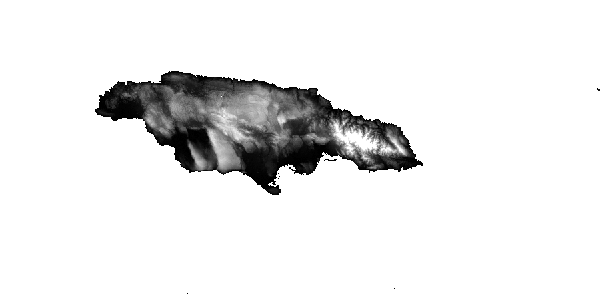

In [8]:
DTM_raster = SetNull(DTM_raster<=0,DTM_raster)
DTM_raster

### 2. Hydrological analysis

Using the hydrological analysis tools, we can derive catchment boundaries and drainage networks (e.g., rivers) from a Digital Elevation Model:

In [ ]:
outFill = calculate_fill(DTM_raster)

In [ ]:
outFlowDirection = calculate_flow_direction(outFill)

In [ ]:
outFlowAccumulation = calculate_flow_accumulation(outFlowDirection)

In [ ]:
outFlowNetwork = calculate_flow_network(outFlowAccumulation, flow_acc_threshold=10000)

Alternatively, we run the complete hydrological routine tool, which integreates all the geoprocessing steps for us and saves outputs in a geodatabase of our choice:

In [10]:
complete_hydrological_routine(DTM_raster,gdb_folder_path, gdb_name, out_filename_root='Routine_DTM', flow_acc_threshold=1000)

### 3. Coastal inundation analysis

The coastal inundation analysis tool uses a Digital Elevation Model to map the extents of flooding based on any set of maximum elevation levels:

In [9]:
out_raster_root_path = 'Inundation_extent_raster'
out_polygon_root_path = 'Inundation_extent_polygon'

inundation_extents(DTM_raster,
                   list_thresholds=[10,15,20],
                   out_raster_root_path=out_raster_root_path,
                   out_polygon_root_path=out_polygon_root_path)

### 4. Geomorphological analysis

The geomorphological toolset also leverages a Digital Elebation Model to derive prodycts such as steep areaa, which are prone tolandslides and rapid runoff:

In [11]:
outSteepAreas = steep_areas(DTM_raster,
                            out_raster_features='steep_areas_raster',
                            out_polygon_features='steep_areas_polygon')

### 5. Hotspot analysis